In [1]:
import torch
import joblib
import pickle
import pandas as pd
import numpy as np
from functions import auroc_curve, evaluation, rm, complete_confusion_matrix_robust, evaluation_robustness, complete_confusion_matrix
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])
model_results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])

path_csv = "../../../Thesis_data/processed_data/"
path_model = "../../../Thesis_data/Models/"

In [2]:
X_test = rm(pd.read_csv(path_csv + "ontime_reporting_X_test.csv"))
y_test = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test.csv"))

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%


## Evaluate Logistic Regression tuned RUS model

In [3]:
logreg_tuned_rus = joblib.load(path_model + "logreg_tuned_RUS.joblib")
y_pred_logreg_tuned_rus = logreg_tuned_rus.predict(X_test)
y_pred_prob_logreg_tuned_rus = logreg_tuned_rus.predict_proba(X_test)[:, 1]

AUROC Score:  0.74
Accuracy Score:  0.797
Balanced Accuracy Score:  0.683
F1 Score:  0.481
Recall Score:  0.499
Precision Score:  0.465


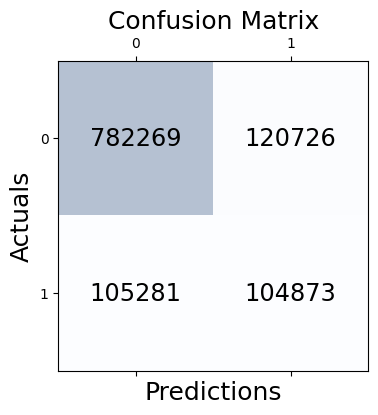

In [4]:
evaluation(y_test, y_pred_logreg_tuned_rus, logreg_tuned_rus, y_pred_prob_logreg_tuned_rus, results)

## Evaluate XGBoost tuned RUS model

In [5]:
xgb_class_tuned_rus = joblib.load(path_model + "XGBoost_tuned_RUS.joblib")
y_pred_xgb_tuned_rus = xgb_class_tuned_rus.predict(X_test)
y_pred_prob_xgb_tuned_rus = xgb_class_tuned_rus.predict_proba(X_test)[:, 1]

AUROC Score:  0.817
Accuracy Score:  0.788
Balanced Accuracy Score:  0.746
F1 Score:  0.547
Recall Score:  0.679
Precision Score:  0.458


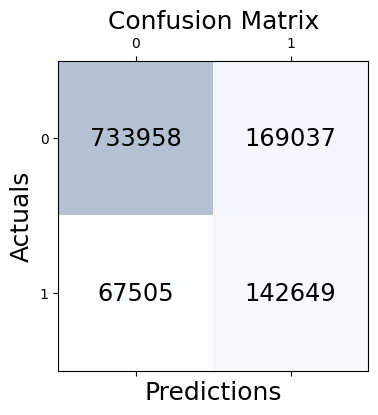

In [6]:
evaluation(y_test, y_pred_xgb_tuned_rus, xgb_class_tuned_rus, y_pred_prob_xgb_tuned_rus, results)

## Evaluate TabNet tuned RUS model

In [9]:
tabnet_tuned_rus = torch.load(path_model + "TabNet_tuned_RUS.pt", map_location=torch.device('cpu'))
tabnet_tuned_rus.device = "cpu"
y_pred_tabnet_tuned_rus = tabnet_tuned_rus.predict(X_test.values)
y_pred_prob_tabnet_tuned_rus = tabnet_tuned_rus.predict_proba(X_test.values)[:, 1]

AUROC Score:  0.746
Accuracy Score:  0.698
Balanced Accuracy Score:  0.68
F1 Score:  0.449
Recall Score:  0.653
Precision Score:  0.342


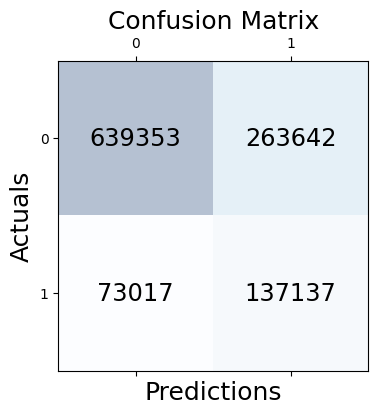

In [10]:
evaluation(y_test, y_pred_tabnet_tuned_rus, tabnet_tuned_rus, y_pred_prob_tabnet_tuned_rus, results)

## Evaluate Random Forests tuned RUS model

In [11]:
rf_tuned_rus = joblib.load(path_model + "rf_tuned_RUS.joblib")
y_pred_rf_tuned_rus = rf_tuned_rus.predict(X_test)
y_pred_prob_rf_tuned_rus = rf_tuned_rus.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   26.2s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:   40.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   24.3s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:   40.6s finished


AUROC Score:  0.795
Accuracy Score:  0.798
Balanced Accuracy Score:  0.725
F1 Score:  0.532
Recall Score:  0.609
Precision Score:  0.473


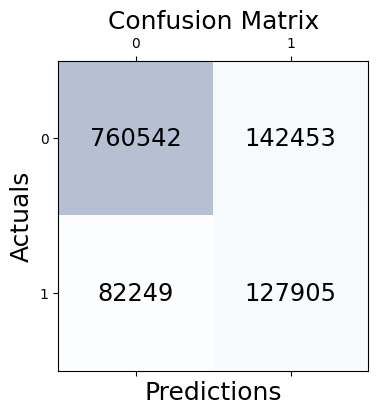

In [12]:
evaluation(y_test, y_pred_rf_tuned_rus, rf_tuned_rus, y_pred_prob_rf_tuned_rus, results)

## Final results per model

In [13]:
results.sort_values(by=["AUROC"], ascending=False)

Model  AUROC  Accuracy     F1  Recall  Precision
2           XGBClassifier  0.817     0.788  0.547   0.679      0.458
4  RandomForestClassifier  0.795     0.798  0.532   0.609      0.473
3        TabNetClassifier  0.746     0.698  0.449   0.653      0.342
1      LogisticRegression  0.740     0.797  0.481   0.499      0.465

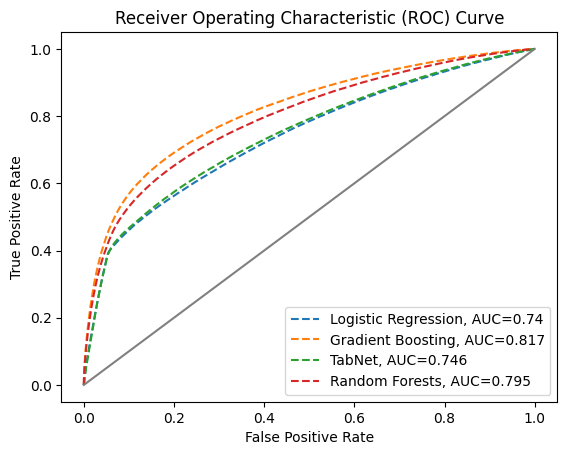

<Figure size 1400x1200 with 0 Axes>

In [14]:
auroc_curve(y_test, y_pred_prob_logreg_tuned_rus, y_pred_prob_xgb_tuned_rus, y_pred_prob_tabnet_tuned_rus, y_pred_prob_rf_tuned_rus)

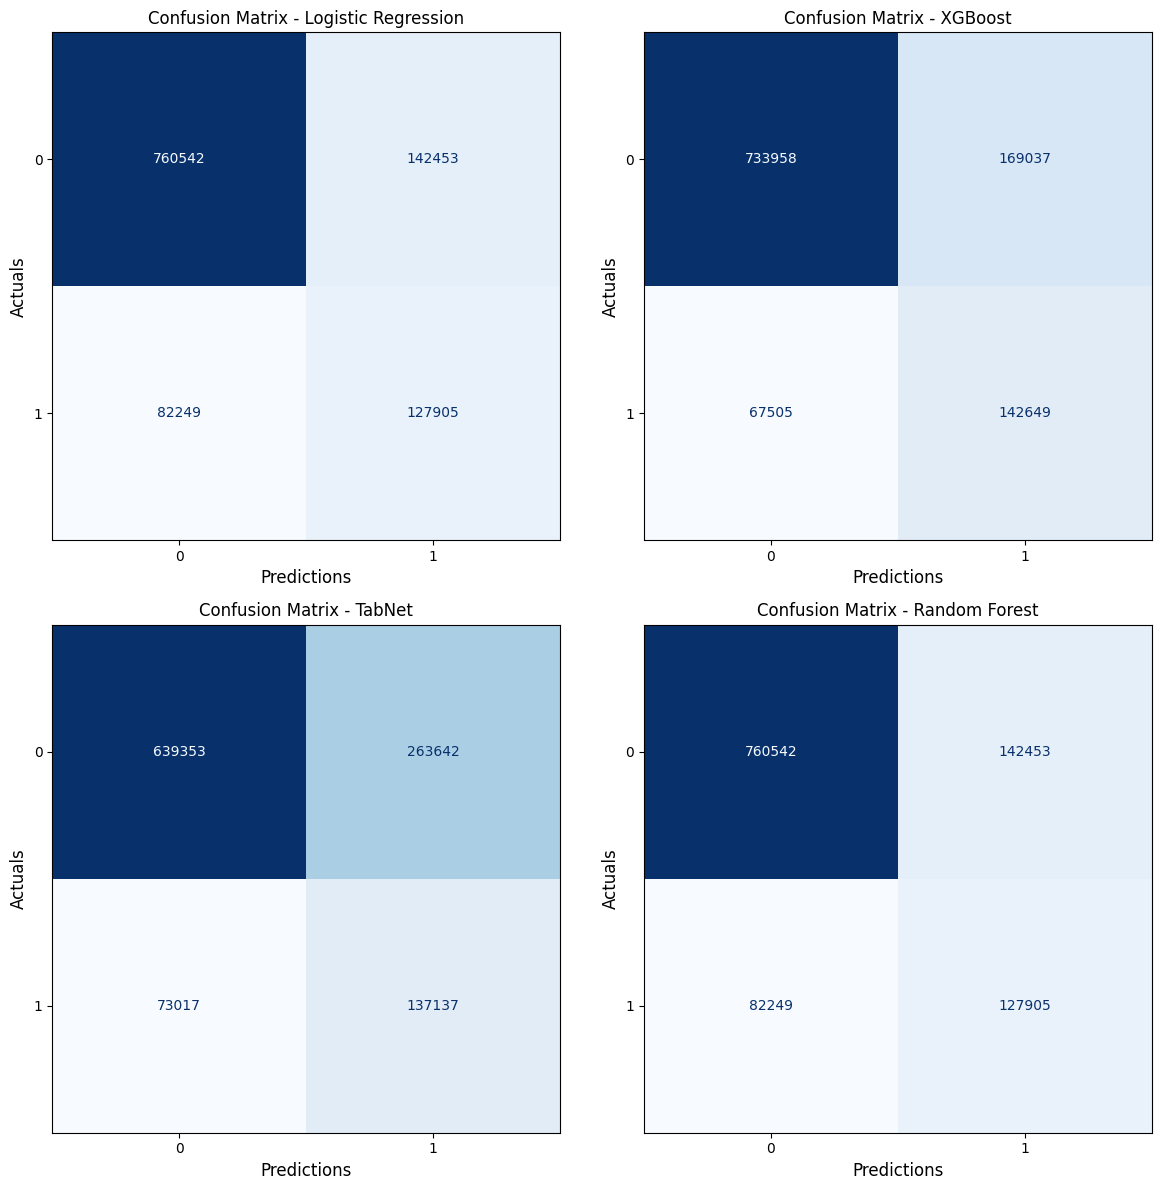

In [15]:
complete_confusion_matrix(y_test, [y_pred_logreg_tuned_rus, 
                                   y_pred_xgb_tuned_rus, 
                                   y_pred_tabnet_tuned_rus, 
                                   y_pred_rf_tuned_rus], 
                                   ['Logistic Regression', 
                                    'XGBoost', 
                                    'TabNet', 
                                    'Random Forest'])